Epoch 0, Loss: 0.2727
Epoch 1000, Loss: 0.2256
Epoch 2000, Loss: 0.1758
Epoch 3000, Loss: 0.1023
Epoch 4000, Loss: 0.0281
Epoch 5000, Loss: 0.0122
Epoch 6000, Loss: 0.0073
Epoch 7000, Loss: 0.0051
Epoch 8000, Loss: 0.0039
Epoch 9000, Loss: 0.0031
Predictions after training (binary):
[[0]
 [1]
 [1]
 [0]]


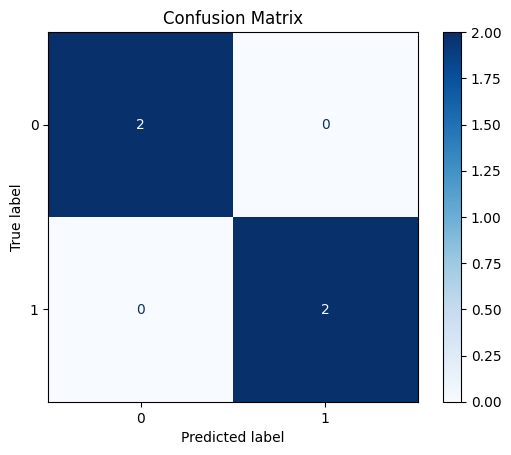

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Class
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)

        # Initialize biases randomly
        self.bias_hidden = np.random.randn(hidden_size)
        self.bias_output = np.random.randn(output_size)

    # Feedforward step
    def feedforward(self, X):
        # Compute hidden layer input and output
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        # Compute output layer input and output
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = sigmoid(self.output_layer_input)

        return self.output_layer_output

    # Backpropagation step
    def backpropagation(self, X, y, output, learning_rate):
        # Calculate the error in output
        output_error = y - output
        output_delta = output_error * sigmoid_derivative(output)

        # Calculate the error in the hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)

        # Update the weights and biases (Gradient Descent)
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate

        self.weights_input_hidden += X.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * learning_rate

    # Train the neural network
    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for epoch in range(epochs):
            # Feedforward
            output = self.feedforward(X)

            # Backpropagation
            self.backpropagation(X, y, output, learning_rate)

            if epoch % 1000 == 0:
                # Print loss (mean squared error)
                loss = np.mean(np.square(y - output))
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    # Predict on new data
    def predict(self, X):
        return self.feedforward(X)

# Training Data (XOR Example)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Define the neural network (2 input neurons, 2 hidden neurons, 1 output neuron)
nn = SimpleNeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the neural network
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)

# Convert predictions to binary (0 or 1) based on a threshold of 0.5
binary_predictions = (predictions > 0.5).astype(int)

# Print predictions and ground truth
print("Predictions after training (binary):")
print(binary_predictions)

# Plot the Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

# Plot confusion matrix for the predictions
plot_confusion_matrix(y, binary_predictions)
